In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
os.chdir("D://Files")

In [29]:
data=pd.read_csv("MMix.csv")

In [30]:
data.head(2)

,NewVolSales,Base Price,Radio,TV,InStore,Facebook,Twitter,WebCamp,Online,Website Campaign,...,tvst60,tvst70,tvst80,tvst90,radiost30,radiost60,radiost70,radiost80,radiost90,Stout
0,19564,15.029276,245.0,145.4,15.452,0,0,0,0,NaN,...,87.240,101.780,116.320,130.860,73.50,147.0,171.50,196.0,220.50,2.28342
1,19387,15.029276,314.0,66.0,16.388,0,0,0,0,NaN,...,74.496,76.734,76.064,72.486,145.65,247.2,271.25,290.4,304.65,2.22134


In [31]:
data.shape

(104, 24)

In [32]:
data.isnull().sum()

NewVolSales           0
Base Price            0
Radio                 4
TV                    0
InStore               0
Facebook              0
Twitter               0
WebCamp               0
Online                0
Website Campaign     90
Inserts               0
NewspaperInserts     98
Discount              0
tvst30                0
tvst60                0
tvst70                0
tvst80                0
tvst90                0
radiost30             0
radiost60             0
radiost70             0
radiost80             0
radiost90             0
Stout                 0
dtype: int64

In [33]:
data.columns

Index(['NewVolSales', 'Base Price', 'Radio ', 'TV ', 'InStore', 'Facebook',
       'Twitter', 'WebCamp', 'Online', 'Website Campaign ', 'Inserts',
       'NewspaperInserts', 'Discount', 'tvst30', 'tvst60', 'tvst70', 'tvst80',
       'tvst90', 'radiost30', 'radiost60', 'radiost70', 'radiost80',
       'radiost90', 'Stout'],
      dtype='object')

In [34]:
data['Radio ']=data['Radio '].fillna(data['Radio '].mean())

In [35]:
#Categorical variable replace with mode value

In [47]:
data['Website Campaign ']=data['Website Campaign '].fillna(data['Website Campaign '].mode()[0])
#data['Website Campaign ']

In [44]:
data['Website Campaign '].mode()

0    Website Campaign 
dtype: object

In [48]:
data['NewspaperInserts']=data['NewspaperInserts'].fillna(data['NewspaperInserts'].mode()[0])

In [50]:
num_cols=data.dtypes[data.dtypes!="object"].index
X=data[num_cols]

In [51]:
X.head()

,NewVolSales,Base Price,Radio,TV,InStore,Facebook,Twitter,WebCamp,Online,Inserts,...,tvst60,tvst70,tvst80,tvst90,radiost30,radiost60,radiost70,radiost80,radiost90,Stout
0,19564,15.029276,245.0,145.4,15.452,0,0,0,0,0,...,87.240000,101.780000,116.320000,130.860000,73.50000,147.0000,171.50000,196.0000,220.50000,2.28342
1,19387,15.029276,314.0,66.0,16.388,0,0,0,0,0,...,74.496000,76.734000,76.064000,72.486000,145.65000,247.2000,271.25000,290.4000,304.65000,2.22134
2,23889,14.585093,324.0,155.1,62.692,0,0,0,0,0,...,122.858400,131.590200,139.292800,146.838600,199.15500,293.2800,308.17500,317.2800,322.06500,2.00604
3,20055,15.332887,298.0,114.5,16.573,0,0,0,0,0,...,117.843360,119.627060,119.458560,117.733860,228.80850,296.1120,301.05250,301.8560,300.40650,2.19897
4,20064,15.642632,279.0,96.5,41.504,0,0,0,0,0,...,105.037344,103.438118,101.091712,98.623386,243.86595,285.8448,285.61575,283.5712,281.14065,1.81860


In [52]:
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt

In [53]:
pca=decomposition.PCA(8)

In [54]:
scalers=preprocessing.StandardScaler()

In [55]:
X1=scalers.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [56]:
pca.fit_transform(X1)

array([[ 3.56705041e+00, -4.60479022e-02, -3.48947008e-01,
        -9.84313630e-01,  1.45736716e+00, -2.13460722e-01,
        -8.63375783e-01, -7.45619476e-02],
       [ 2.71794333e+00, -3.11875234e+00, -4.40492774e-01,
        -1.08021466e+00,  1.49607918e+00, -6.85472246e-02,
        -6.22841558e-01,  2.92091852e-02],
       [-7.83251662e-01, -1.47546368e+00,  3.55693316e+00,
        -7.56147437e-02,  4.51331894e-01,  8.22683508e-01,
        -4.86062866e-01, -5.01497745e-03],
       [ 3.72139419e-01, -1.83096862e+00, -6.72302510e-01,
        -1.08754413e+00,  1.20177894e+00, -8.68946445e-02,
        -5.34281161e-01, -9.49843441e-02],
       [ 7.06591174e-01, -2.14910906e+00,  8.35477189e-01,
        -9.09316058e-01,  2.40038152e-01,  1.54464599e+00,
        -2.99803395e-01,  1.15797356e+00],
       [ 4.64375676e-01, -7.00264913e-01, -8.70524399e-01,
        -9.73137422e-01,  7.70552809e-01, -6.52570277e-02,
        -4.87542496e-01,  5.36018996e-02],
       [ 2.03137482e+00, -1.643817

In [18]:
pca.components_#loadings(eigen vectors)

array([[-0.09997315, -0.00321187, -0.26666497, -0.27009809, -0.01926144,
        -0.07683693, -0.10719808,  0.1330358 , -0.01281123,  0.03280397,
        -0.10623088, -0.21710764, -0.27449781, -0.27856161, -0.27855149,
        -0.27551499, -0.30187529, -0.30097658, -0.29472558, -0.28784275,
        -0.28061212,  0.11910337],
       [ 0.02789066,  0.02151018, -0.29933226,  0.28721157, -0.0098861 ,
        -0.00661997,  0.03373204, -0.03280367, -0.00713325,  0.01711332,
        -0.01566567,  0.27818016,  0.3067183 ,  0.30585444,  0.3020038 ,
         0.29568947, -0.19958886, -0.28197311, -0.29083914, -0.29564515,
        -0.29762716,  0.01259892],
       [ 0.54034075, -0.4473407 , -0.04852513, -0.03009299,  0.45446456,
        -0.24195389,  0.01617696, -0.06523021, -0.17177161, -0.03770944,
         0.42326288, -0.02324833, -0.03784034, -0.03683559, -0.03511231,
        -0.03288563,  0.00763375, -0.03446527, -0.03929254, -0.04289319,
        -0.04604449, -0.11220077],
       [ 0.018582  

In [19]:
pca.explained_variance_ratio_ # eigen values
#it will tell you how much variation in the data is being explained in each PCA

array([0.26878102, 0.2551221 , 0.11121242, 0.09040394, 0.06151774,
       0.0523145 , 0.0449761 , 0.03646583])

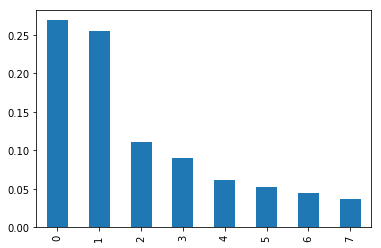

In [57]:
pd.Series(pca.explained_variance_ratio_).plot(kind='bar')

In [21]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [22]:
var1

array([26.88, 52.39, 63.51, 72.55, 78.7 , 83.93, 88.43, 92.08])

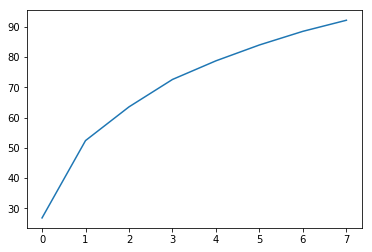

In [23]:
plt.plot(var1)

In [58]:
#HR data set
hr=pd.read_csv("hr.csv")

In [38]:
hr.head()

,EmployeeCount,EmployeeID,Department,JobRole,Attrition,Gender,Age,MaritalStatus,Education,EducationField,...,Hourlyrate,Income,Salaryhike,OverTime,Workex,YearsSinceLastPromotion,EmpSatisfaction,TrainingTimesLastYear,WorkLifeBalance,Performance_Rating
0,1,1,Sales,Sales Executive,Yes,Female,41,Single,College,Life Sciences,...,94,5993,11,Yes,8,0,Medium,0,Bad,Excellent
1,1,2,Research & Development,Research Scientist,No,Male,49,Married,Below College,Life Sciences,...,61,5130,23,No,10,1,High,3,Better,Outstanding
2,1,4,Research & Development,Laboratory Technician,Yes,Male,37,Single,College,Other,...,92,2090,15,Yes,7,0,Very High,3,Better,Excellent
3,1,5,Research & Development,Research Scientist,No,Female,33,Married,Master,Life Sciences,...,56,2909,11,Yes,8,3,Very High,3,Better,Excellent
4,1,7,Research & Development,Laboratory Technician,No,Male,27,Married,Below College,Medical,...,40,3468,12,No,6,2,Low,3,Better,Excellent


In [59]:
num_cols=hr.dtypes[hr.dtypes!="object"].index
X=hr[num_cols]

In [60]:
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt

In [61]:
pca=decomposition.PCA()

In [62]:
scalers=preprocessing.StandardScaler()

In [63]:
X1=scalers.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [68]:
pca.fit_transform(X1)

array([[-0.23267251,  0.48577179,  2.34901279, ..., -0.44886544,
         0.04835721,  0.        ],
       [ 0.13933405,  1.90264845,  0.6655764 , ..., -0.50613171,
         0.16223513, -0.        ],
       [-1.41441494,  0.32196307,  0.84294622, ...,  0.0705917 ,
        -0.01543013, -0.        ],
       ...,
       [-1.04329951, -0.77799475,  2.42129595, ..., -0.09022   ,
         0.06072238, -0.        ],
       [ 0.5370486 , -1.33650638, -0.19897687, ...,  0.2708036 ,
         0.10832914,  0.        ],
       [-0.84171679, -1.97628889, -0.05699243, ..., -0.29013155,
         0.28965233,  0.        ]])

In [69]:
pca.components_#loadings

array([[ 0.        , -0.01346379,  0.39449504,  0.50737335, -0.00917387,
         0.50368221, -0.01992522,  0.50478167,  0.27816805, -0.02014291],
       [ 0.        , -0.68496471, -0.04282404,  0.00405775, -0.5943357 ,
        -0.00196329,  0.32952088, -0.01306195,  0.03284948, -0.25671092],
       [-0.        , -0.082868  ,  0.09278731, -0.02592687,  0.56407508,
        -0.01442181,  0.28480742,  0.02820244, -0.12889467, -0.75295288],
       [-0.        ,  0.22753582,  0.07726669, -0.0041651 ,  0.06169268,
         0.00235151,  0.89179228,  0.02068383, -0.03964293,  0.37568017],
       [ 0.        , -0.68690091,  0.05392445, -0.00646116,  0.54263439,
        -0.00468693, -0.06848887,  0.00590739, -0.0529688 ,  0.47245336],
       [-0.        , -0.01263707, -0.29177971, -0.10413823,  0.1519339 ,
        -0.10628013,  0.07982024, -0.06748567,  0.92544589, -0.04588109],
       [-0.        , -0.00134605,  0.77101825, -0.40445928, -0.08405148,
        -0.42793398, -0.05925655,  0.12973282

In [70]:
pca.explained_variance_ratio_

array([0.36832528, 0.11613213, 0.11259258, 0.11053145, 0.10607039,
       0.0907447 , 0.06861042, 0.0215048 , 0.00548825, 0.        ])

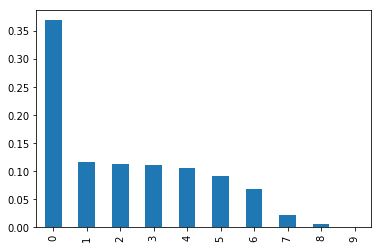

In [73]:
pd.Series(pca.explained_variance_ratio_).plot(kind='bar')

In [75]:
var2=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

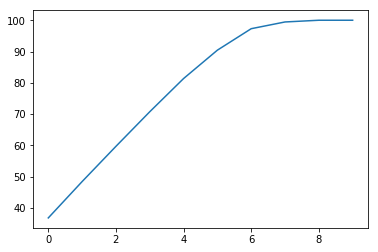

In [77]:
plt.plot(var2)

In [112]:
#unstructured data
review=pd.read_csv("reviews.csv")

In [113]:
review.head(2)

,ID,V1,V2,V3,Date,V4,review_title,review_detail,Unnamed: 8
0,B00FB2XNCE,3,67,81,"October 3, 2013",AA7CHSYLJOSY4,Blu Tooth Issues resolved - Updated,Bought this device as second Android screen fo...,NaN
1,B00FB2XNCE,1,1,5,"August 8, 2014",A1WWGDOFTCW8Q,One Star,"Bad qulity its not water proof , now my watch ...",NaN


In [114]:
data=review["review_title"]

In [116]:
data=data.tolist()

In [117]:
data

['Blu Tooth Issues resolved - Updated',
 'One Star',
 'Excelente producto... recomendado 100%',
 'I am extremely glad I purchased it',
 'same as the old one, just bigger screen',
 'Five Stars',
 'One Star',
 "The Bluetooth doesn't work instantly. Whenever I got notice ...",
 'Five Stars',
 'Five Stars',
 'Five Stars',
 'Get the galaxy gear instead.',
 'Awesome new toy.',
 'Great for reading notifications and SMS messages!',
 'Ok smartwatch',
 'Not what I expected, but everything it claims to be.',
 'Good for the price',
 'The Sony SW2 is far more than what I had originally expected',
 'APRIL UPDATE allows you to change background wallpaper.',
 'Watch out!',
 'Not quite what it could be',
 'Fail',
 'It did but the screen resolution sucked, and connecting with your smartphone was clunky and ...',
 'Four Stars',
 'Not Galaxy Gear, but that was not what I was going for.',
 'Five Stars',
 "So cool! Got one for my husband for Father's Day ...",
 'Battery life is good. Comfortable to wear',
 

In [119]:
from sklearn.feature_extraction import text
tf=text.TfidfVectorizer(data,ngram_range=(1,2),stop_words='english')
matrix_tfidf=tf.fit_transform(data)

In [123]:
data2=pd.DataFrame(matrix_tfidf.toarray(),columns=tf.get_feature_names())

In [124]:
data2.head()

,100,11,11 days,200,2hrs,2hrs use,3rd,3rd edition,3rd party,absolute,...,worth money,wow,wrist,wrist phone,wristwear,xperia,xperia z1,z1,z2,z2 just
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.377964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
import sklearn.decomposition as decomposition
svd=decomposition.TruncatedSVD(n_components=300) # I need 100 components
matrix_reduced_svd=svd.fit_transform(matrix_tfidf)

In [154]:
svd.components_

array([[ 2.63766064e-16,  3.24307492e-18,  1.35952264e-17, ...,
        -9.05690013e-19, -5.09906195e-19, -5.09906195e-19],
       [-2.04729580e-18,  1.44024306e-04,  1.44024306e-04, ...,
         3.58998085e-04,  3.38922470e-04,  3.38922470e-04],
       [-4.13755478e-17, -5.54048216e-04, -5.54048216e-04, ...,
         2.42736848e-04,  1.76955668e-03,  1.76955668e-03],
       ...,
       [ 2.36860514e-03,  2.19920191e-01, -4.16122116e-02, ...,
        -6.02946317e-03,  1.31869129e-02,  1.31869129e-02],
       [ 3.45090994e-02,  3.13199170e-02, -1.00067259e-02, ...,
        -8.96906463e-03,  5.47152965e-04,  5.47152965e-04],
       [ 3.04960968e-03,  1.21295812e-01, -6.90142216e-02, ...,
        -3.57795151e-03, -2.05133630e-02, -2.05133630e-02]])

In [155]:
svd.explained_variance_ratio_

array([1.07240730e-01, 3.62679979e-02, 2.18495577e-02, 1.92965597e-02,
       1.88373493e-02, 1.82013966e-02, 1.58895220e-02, 1.40527598e-02,
       1.33620176e-02, 1.05265331e-02, 9.56908977e-03, 9.78378648e-03,
       9.24728364e-03, 8.32469673e-03, 8.56925365e-03, 8.21655605e-03,
       7.97394032e-03, 7.40478520e-03, 7.16614225e-03, 6.78667169e-03,
       6.59873100e-03, 6.45603566e-03, 6.40127205e-03, 5.85115054e-03,
       5.87683699e-03, 5.63377812e-03, 5.64348753e-03, 5.48075803e-03,
       5.45238774e-03, 5.41782485e-03, 5.27396245e-03, 5.08964617e-03,
       4.98945516e-03, 4.95961738e-03, 4.74730624e-03, 4.73475123e-03,
       4.63745808e-03, 4.50487301e-03, 4.47158581e-03, 4.39980782e-03,
       4.37168663e-03, 4.26405125e-03, 4.25413223e-03, 4.14463046e-03,
       4.09964039e-03, 4.05541936e-03, 4.03601031e-03, 4.01123250e-03,
       3.97314458e-03, 3.94811050e-03, 3.87105276e-03, 3.86156481e-03,
       3.84210597e-03, 3.79343889e-03, 3.77400638e-03, 3.69780018e-03,
      

In [156]:
matrix_reduced_svd.shape

(349, 300)

In [157]:
var=np.cumsum(np.round(svd.explained_variance_ratio_, decimals=4)*100)

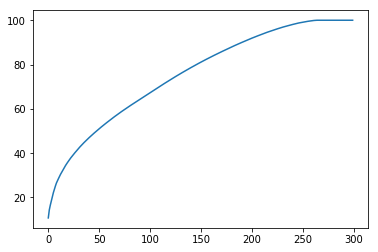

In [158]:
plt.plot(var)

In [159]:
var

array([ 10.72,  14.35,  16.53,  18.46,  20.34,  22.16,  23.75,  25.16,
        26.5 ,  27.55,  28.51,  29.49,  30.41,  31.24,  32.1 ,  32.92,
        33.72,  34.46,  35.18,  35.86,  36.52,  37.17,  37.81,  38.4 ,
        38.99,  39.55,  40.11,  40.66,  41.21,  41.75,  42.28,  42.79,
        43.29,  43.79,  44.26,  44.73,  45.19,  45.64,  46.09,  46.53,
        46.97,  47.4 ,  47.83,  48.24,  48.65,  49.06,  49.46,  49.86,
        50.26,  50.65,  51.04,  51.43,  51.81,  52.19,  52.57,  52.94,
        53.3 ,  53.66,  54.02,  54.38,  54.74,  55.1 ,  55.45,  55.8 ,
        56.15,  56.49,  56.83,  57.17,  57.51,  57.84,  58.17,  58.5 ,
        58.82,  59.14,  59.46,  59.78,  60.1 ,  60.41,  60.72,  61.03,
        61.34,  61.64,  61.94,  62.24,  62.54,  62.84,  63.14,  63.44,
        63.74,  64.04,  64.34,  64.64,  64.94,  65.24,  65.54,  65.84,
        66.13,  66.42,  66.72,  67.02,  67.32,  67.62,  67.92,  68.21,
        68.5 ,  68.8 ,  69.1 ,  69.4 ,  69.7 ,  69.99,  70.29,  70.59,
      

In [160]:
var[199]

91.80999999999997